# Overview

This week we are going to learn a bit about __Data Visualization__, which is an important aspect in Computational Social Science. Why is it so important to make nice plots if we can use stats and modelling? I hope I will convince that it is _very_ important to make meaningful visualizations. Then, we will try to produce some beautiful figures using the data we downloaded last week. 

Here is the plan:

* __Part 1__: Some talking from me on __why do we even care about visualizing data__. 
* __Part 2__: Here is where you convince yourself that data visualization is useful by doing a __little visualization exercise__.
* __Part 3__: We will look at the relation between the attention to GME on Reddit and the evolution of the GME market indicators.
* __Part 4__: We will visualize the activity of Redditors posting about GME.


## Part 1: Intro to visualization

Start by watching this short introduction video to Data Visualization.
    

> * _Video Lecture_: [Intro to Data Visualization](https://www.youtube.com/watch?v=oLSdlg3PUO0)

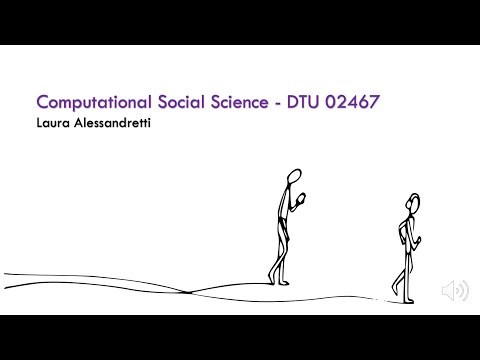

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("oLSdlg3PUO0",width=800, height=450)


There are many types of data visualizations, serving different purposes. Today we will look at some of those types for visualizing single variable data: _line graphs_ and _histograms_. We will also use _scatter plots_ two visualize two variables against each other. 
Before starting, read the following sections of the data visualization book.

> * _Reading_ [Sections 2,3.2 and 5 of the data visualization book](https://clauswilke.com/dataviz/aesthetic-mapping.html)

## Part 2: A little visualization exercise

Ok, but is data visualization really so necessary? Let's see if I can convince you of that with this little visualization exercise.


> *Exercise 1: Visualization vs stats*
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is.


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

And the [video below](https://www.youtube.com/watch?v=DbJyPELmhJc) generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises.


In [6]:
"""Download data"""
import urllib.request
for i in range(1, 5):
    url = f'https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data{i}.tsv'
    filename = f'data/week2/data{i}.txt'
    urllib.request.urlretrieve(url, filename)

Means of data1 is; mean(x) = 9.0 and mean(y) = 7.500909090909093
Means of data2 is; mean(x) = 9.0 and mean(y) = 7.50090909090909
Means of data3 is; mean(x) = 9.0 and mean(y) = 7.5
Means of data4 is; mean(x) = 9.0 and mean(y) = 7.500909090909091

Means of data1 is; mean(x) = 9.00 and mean(y) = 7.50
Means of data2 is; mean(x) = 9.00 and mean(y) = 7.50
Means of data3 is; mean(x) = 9.00 and mean(y) = 7.50
Means of data4 is; mean(x) = 9.00 and mean(y) = 7.50

Variance of data1 is; var(x) = 11.000 and var(y) = 4.127
Variance of data2 is; var(x) = 11.000 and var(y) = 4.128
Variance of data3 is; var(x) = 11.000 and var(y) = 4.123
Variance of data4 is; var(x) = 11.000 and var(y) = 4.123

Pearson correlation of data1 is; r = 0.816
Pearson correlation of data2 is; r = 0.816
Pearson correlation of data3 is; r = 0.816
Pearson correlation of data4 is; r = 0.817

For data1 we see the linear regression f(x) = ax+b with; a = 0.500 and b = 3.000
For data2 we see the linear regression f(x) = ax+b with; a

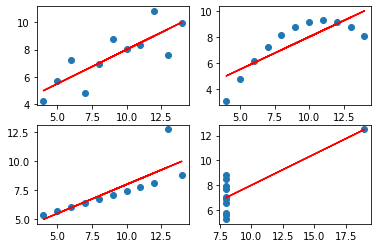

In [55]:
### Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset.
import csv
import pandas as pd

# Load data
data1 = pd.read_csv('data/week2/data1.txt', sep='\t', names=['x', 'y'])
data2 = pd.read_csv('data/week2/data2.txt', sep='\t', names=['x', 'y'])
data3 = pd.read_csv('data/week2/data3.txt', sep='\t', names=['x', 'y'])
data4 = pd.read_csv('data/week2/data4.txt', sep='\t', names=['x', 'y'])

# Print means of data collumns
print("Means of data{0} is; mean(x) = {1} and mean(y) = {2}".format(1, data1['x'].mean(), data1['y'].mean()))
print("Means of data{0} is; mean(x) = {1} and mean(y) = {2}".format(2, data2['x'].mean(), data2['y'].mean()))
print("Means of data{0} is; mean(x) = {1} and mean(y) = {2}".format(3, data3['x'].mean(), data3['y'].mean()))
print("Means of data{0} is; mean(x) = {1} and mean(y) = {2}".format(4, data4['x'].mean(), data4['y'].mean()))
print("")


### Use python string formatting to print precisely two decimal places of these results to the output cell. Check out this stackoverflow page for help with the string formatting.

# Print means of data columns with 2 decimal points
print("Means of data{:} is; mean(x) = {:.2f} and mean(y) = {:.2f}".format(1, data1['x'].mean(), data1['y'].mean()))
print("Means of data{:} is; mean(x) = {:.2f} and mean(y) = {:.2f}".format(2, data2['x'].mean(), data2['y'].mean()))
print("Means of data{:} is; mean(x) = {:.2f} and mean(y) = {:.2f}".format(3, data3['x'].mean(), data3['y'].mean()))
print("Means of data{:} is; mean(x) = {:.2f} and mean(y) = {:.2f}".format(4, data4['x'].mean(), data4['y'].mean()))
print("")


### Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).

# Print variances of data columns with 3 decimal points
print("Variance of data{:} is; var(x) = {:.3f} and var(y) = {:.3f}".format(1, data1['x'].var(), data1['y'].var()))
print("Variance of data{:} is; var(x) = {:.3f} and var(y) = {:.3f}".format(2, data2['x'].var(), data2['y'].var()))
print("Variance of data{:} is; var(x) = {:.3f} and var(y) = {:.3f}".format(3, data3['x'].var(), data3['y'].var()))
print("Variance of data{:} is; var(x) = {:.3f} and var(y) = {:.3f}".format(4, data4['x'].var(), data4['y'].var()))
print("")


### Use scipy.stats.pearsonr to calculate the Pearson correlation between x- and y-values for all four data sets (also to three decimal places).

from scipy import stats

# Print pearson correlation for all data
#print(stats.pearsonr(data1['x'], data1['y']))
print("Pearson correlation of data{:} is; r = {:.3f}".format(1, stats.pearsonr(data1['x'], data1['y'])[0]))
print("Pearson correlation of data{:} is; r = {:.3f}".format(2, stats.pearsonr(data2['x'], data2['y'])[0]))
print("Pearson correlation of data{:} is; r = {:.3f}".format(3, stats.pearsonr(data3['x'], data3['y'])[0]))
print("Pearson correlation of data{:} is; r = {:.3f}".format(4, stats.pearsonr(data4['x'], data4['y'])[0]))
print("")


### The next step is use linear regression to fit a straight line f(x)=ax+b through each dataset and report a and b (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. It works like this
### from scipy import stats
### slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Calculate linear regression of all data
slope1, intercept1, r_value, p_value, std_err = stats.linregress(data1['x'], data1['y'])
print("For data{:} we see the linear regression f(x) = ax+b with; a = {:.3f} and b = {:.3f}".format(1, slope1, intercept1))
slope2, intercept2, _, _, _ = stats.linregress(data2['x'], data2['y'])
print("For data{:} we see the linear regression f(x) = ax+b with; a = {:.3f} and b = {:.3f}".format(2, slope2, intercept2))
slope3, intercept3, _, _, _ = stats.linregress(data3['x'], data3['y'])
print("For data{:} we see the linear regression f(x) = ax+b with; a = {:.3f} and b = {:.3f}".format(3, slope3, intercept3))
slope4, intercept4, _, _, _ = stats.linregress(data4['x'], data4['y'])
print("For data{:} we see the linear regression f(x) = ax+b with; a = {:.3f} and b = {:.3f}".format(4, slope4, intercept4))
print("")


### Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two subplot to put all of the plots nicely in a grid and use the same x and y range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version here.)
import matplotlib.pyplot as plt


for i in range(1, 5):
    ax = plt.subplot(2, 2, i)
    filename = f'data/week2/data{i}.txt'
    df = pd.read_csv(filename, sep='\t', names=['x', 'y'])
    a, b, _, _, _ = stats.linregress(df['x'], df['y'])
    ax.scatter(df['x'], df['y'])
    x = df['x']
    y = a*x + b
    ax.plot(x, y, '-r')


### Explain - in your own words - what you think my point with this exercise is.




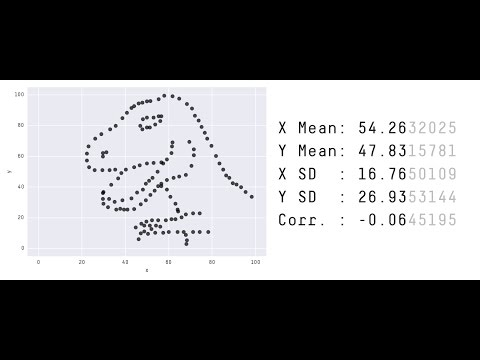

In [81]:
from IPython.display import YouTubeVideo
YouTubeVideo("DbJyPELmhJc",width=800, height=450)



## Prelude to Part 3: Some tips to make nicer figures.

Before even starting visualizing some cool data, I just want to give a few tips for making nice plots in matplotlib. Unless you are already a pro-visualizer, those should be pretty useful to make your plots look much nicer. 
Paying attention to details can make an incredible difference when we present our work to others.

> _Video Lecture_: [How to improve your plots](https://www.youtube.com/watch?v=sdszHGaP_ag)

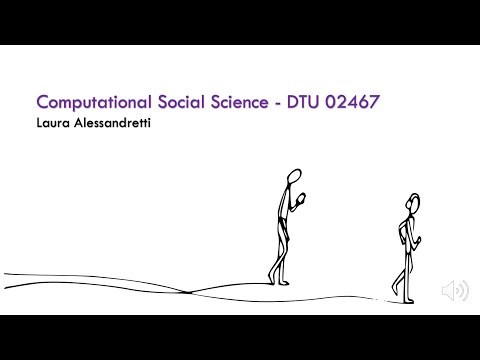

In [90]:
from IPython.display import YouTubeVideo
YouTubeVideo("sdszHGaP_ag",width=800, height=450)


## Part 3:  Time series of Reddit activity and market indicators.

It's really time to put into practice what we learnt by plotting some data! We will start by looking at the time series describing the number of comments about GME in wallstreetbets over time. We will try to see how that relates to the volume and price of GME over time, through some exploratory data visualization.

 We will use two datasets today: 
 * the _GME market data_, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 3. We will refer to this as the _comments dataset_.

> _Exercise 2 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html) to appreciate changes across orders of magnitude.
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

In [62]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def setup_mpl():
    mpl.rcParams['font.family'] = 'Comic Sans MS'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

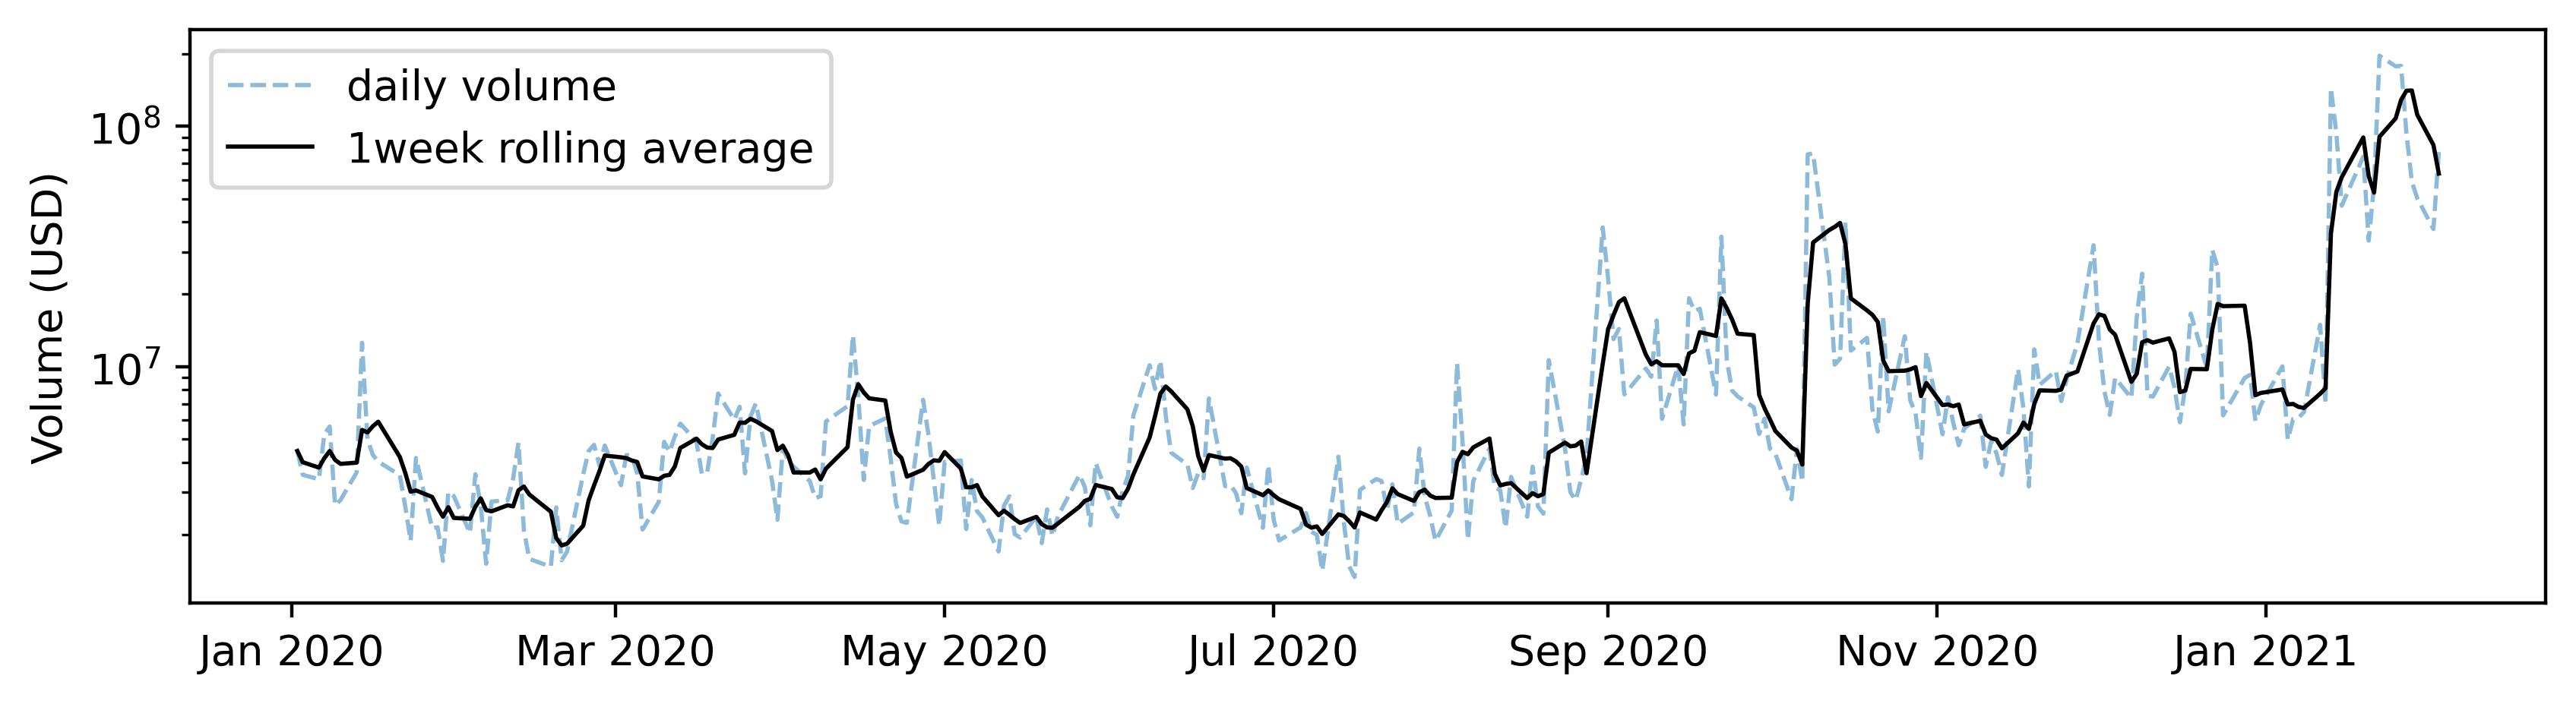

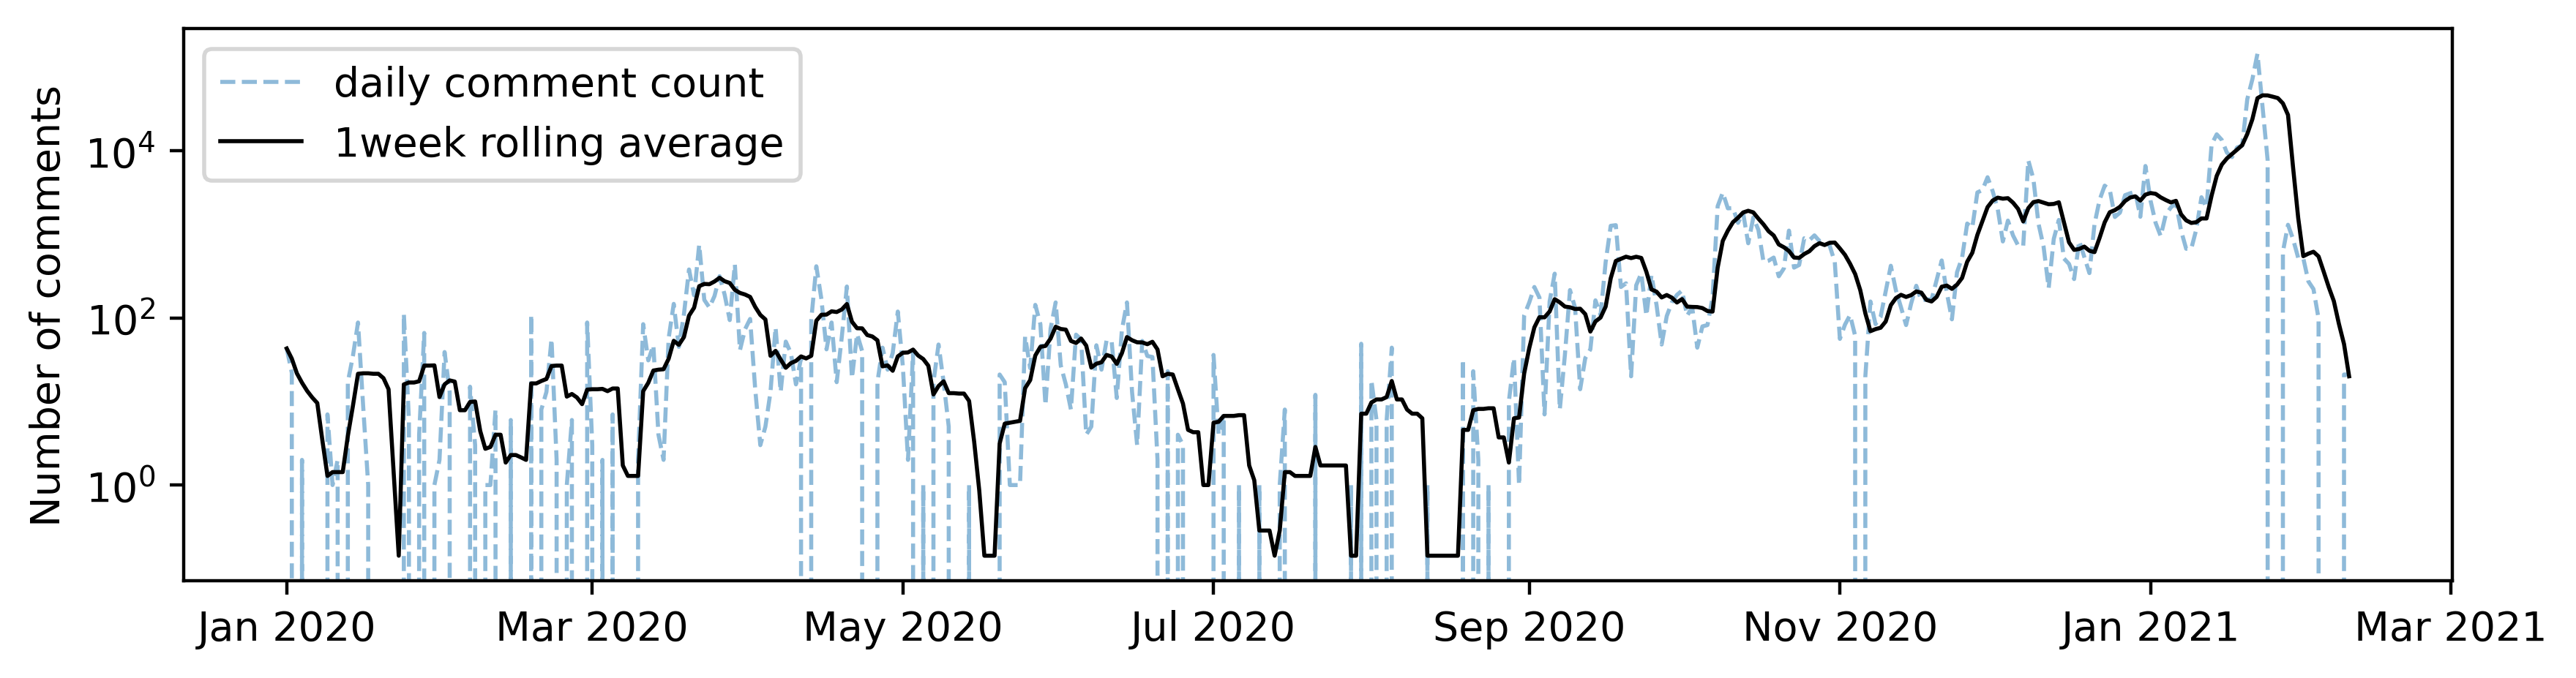

In [91]:
### Exercise 2 : Plotting prices and comments using line-graphs. 

### 1. Plot the daily volume of the GME stock over time using the GME market data. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function pd.rolling). Use a log-scale on the y-axis to appreciate changes across orders of magnitude. 

# First read GME data
GME_data = pd.read_csv('data/week2/GME.csv', parse_dates=['Date']).set_index('Date')

# Now we plot the data with rolling average
fig, ax = plt.subplots(figsize=(10,2.5), dpi=400)               # Create figure and plot
ax.plot(GME_data.index, GME_data.Volume, ls='--', alpha=0.5, label='daily volume')    # Plot data

GME_rolling = GME_data['Volume'].rolling('7D').mean()           # Create rolling average of GME data and plot it also
ax.plot(GME_rolling.index, GME_rolling.values, color = 'k', label='1week rolling average')
ax.legend()

myFmt = mdates.DateFormatter('%b %Y')                           # Change xaxis so it spells out the month
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Volume (USD)')                                   # Set y label
ax.set_yscale('log')                                            # Set y scale to logarithmic


### 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.

# First read reddit comments data
wsb_comments = pd.read_csv('data/week1/wallstreetbets_GME_comments.csv', parse_dates=['date'])

# Get number of comments per day
num_comments = wsb_comments.resample('1D', on = 'date')["comment_id"].count()


# Now we plot the data with rolling average
fig, ax = plt.subplots(figsize=(10,2.5), dpi=400)               # Create figure and plot data
ax.plot(num_comments.index, num_comments, ls='--', alpha=0.5, label='daily comment count') 

comments_rolling = num_comments.rolling('7D').mean()           # Create rolling average of GME data and plot it also
#print(comments_rolling)
ax.plot(comments_rolling.index, comments_rolling.values, color = 'k', label='1week rolling average')
ax.legend()

myFmt = mdates.DateFormatter('%b %Y')   # Change xaxis so it spells out the month
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Number of comments')     # Set y label
ax.set_yscale('log')                    # Set y scale to logarithmic

### 3. Now take a minute to look at these two figures. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?


"""
They follow each other
"""



> _Exercise 3 : Returns vs number of submissions using scatter-plots_.
> In this exercise, we will look at the association between GME market indicators and the attention on Reddit. First, we will create the time-series of daily [returns](https://en.wikipedia.org/wiki/Price_return). Returns measure the  change in price given two given points in time (in our case we will focus on consecutive days). They really constitute the quantity of interest when it comes to stock time-series, because they tell us how much _money_ one would make if he/she bought the stock on a given day and sold it at a later time. For consistency, we will also compute returns (corresponding to daily changes) for the number of Reddit submissions over time.
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new submissions as  ``np.log(submissions(t)/submissions(t-1))`` where ``submissions(t)`` is the number of submissions on day t. 
> 3. Compute the [Pearson correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) between the series computed in step 1 and step 2 (note that you need to first remove days without any submissions from the time-series). Is the correlation statistically significant? 
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of submission. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it?
> 6. _Bonus step (Optional)_: Repeat steps 2-5 using the total number of comments instead of the total number of submissions. Do you notice anything different?

(-0.0009740693514448499, 0.9931580469335923)


Text(0, 0.5, 'Log Change number of comments')

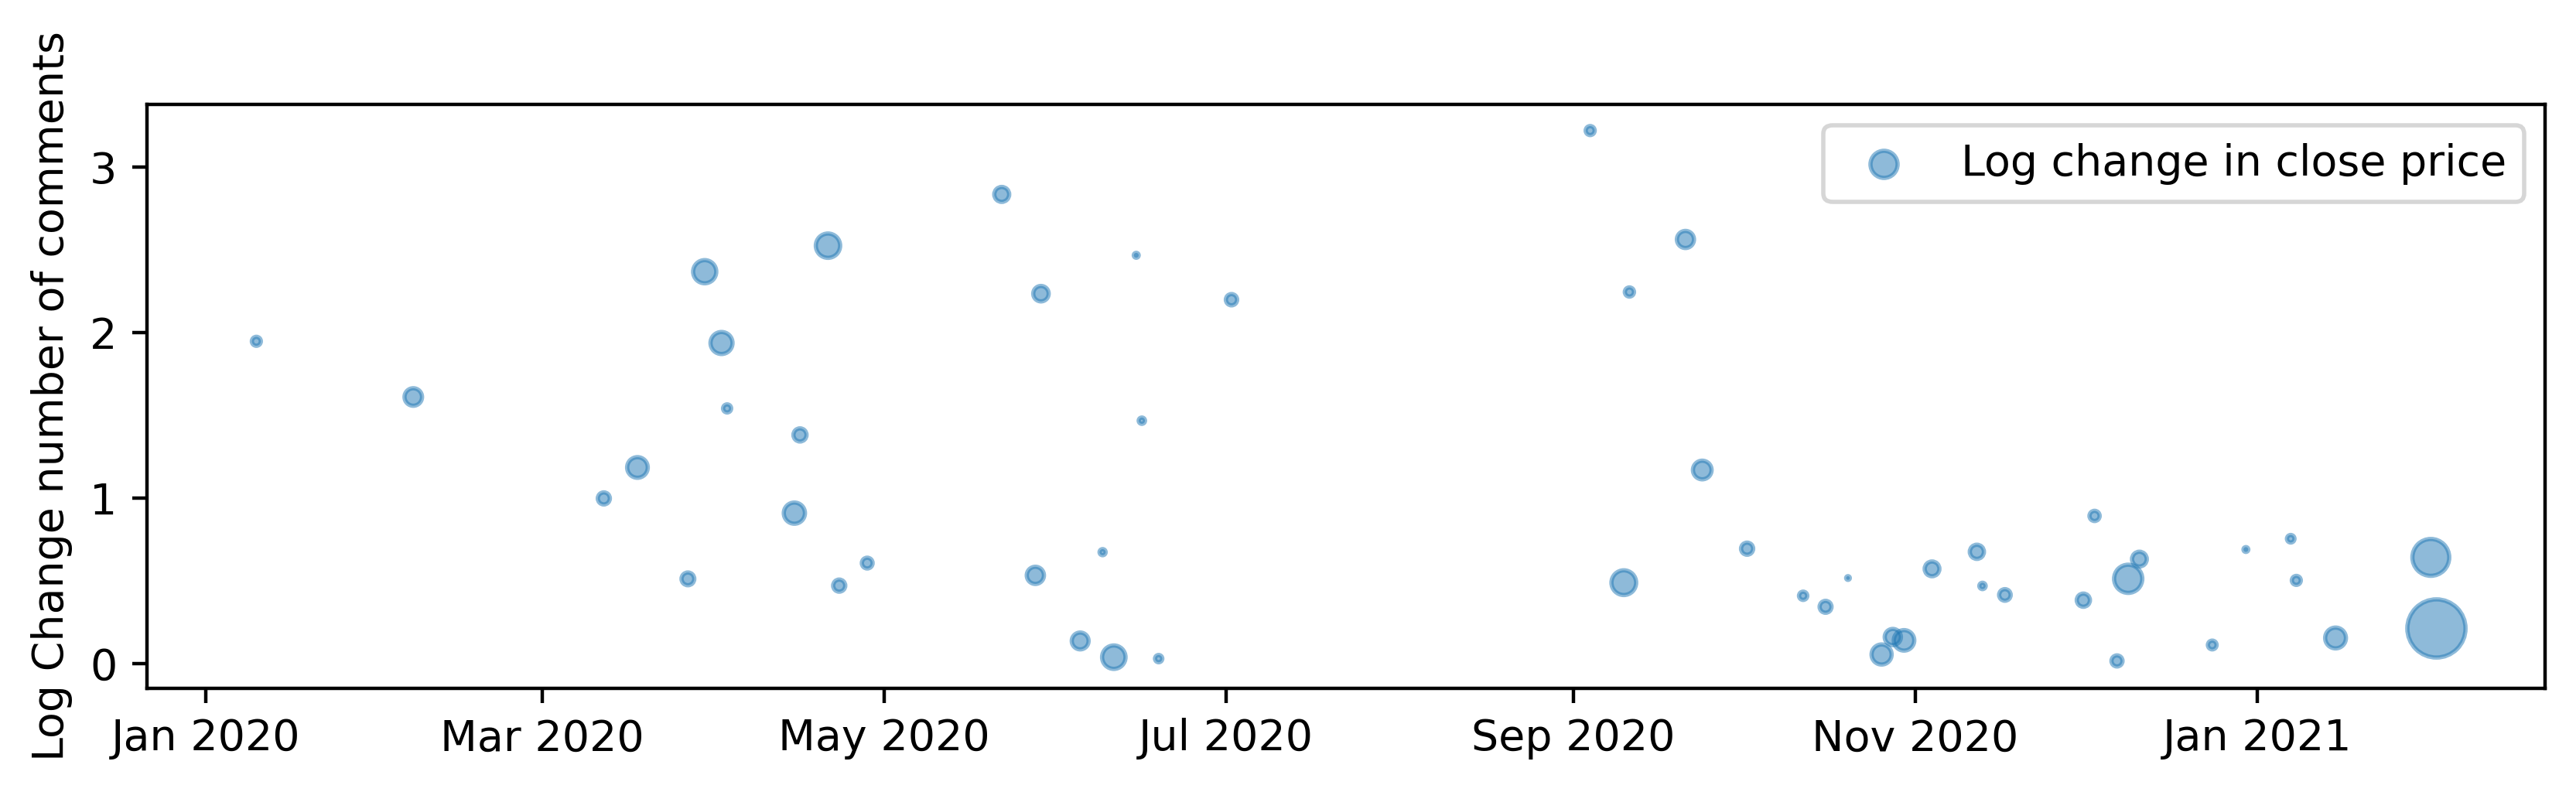

In [31]:
### Exercise 3 : Returns vs comments using scatter-plots. In this exercise, we will look at the association between GME market indicators and the attention on Reddit. First, we will create the time-series of daily returns. Returns are measured as the difference between prices at two given points in time (in our case two consecutive days). They really constitute the quantity of interest when it comes to stock time-series, because they tell us how much money one would make if he/she bought the stock on a given day and sold it at a later time. For consistency, we will also compute returns (corresponding to daily changes) for the number of Reddit comments over time.

import numpy as np
import pandas as pd
from scipy import stats

### 1. Compute the daily log-returns as np.log(Close_price(t)/Close_price(t-1)), where Close_price(t) is the Close Price of GME on day t. You can use the function pd.Series.shift. Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out this blog post.

# First read GME data
GME_data = pd.read_csv('data/week2/GME.csv', parse_dates=['Date']).set_index('Date')

# Compute daily log returns
log_daily_return = np.log(GME_data.Close.shift(1) / GME_data.Close.shift(0))
#print(log_daily_return)


### 2. Compute the daily log-change in number of new submissions as np.log(submissions(t)/submissions(t-1)) where submissions(t) is the number of submissions on day t.

# First read reddit comments data
wsb_comments = pd.read_csv('data/week1/wallstreetbets_GME_comments.csv', parse_dates=['date'])

# Get number of comments per day
num_comments = wsb_comments.resample('1D', on = 'date')["comment_id"].count()

# Compute daily comment log-change
log_daily_commentchange = np.log(num_comments.shift(1) / num_comments.shift(0))
#print(log_daily_commentchange)


### 3. Compute the Pearson correlation between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant?

# Make dataframe
log_returns_df = pd.DataFrame(log_daily_return)
log_comment_df = pd.DataFrame(log_daily_commentchange)

# Remove all dates with zero comments
log_comment_df = log_comment_df[log_comment_df.comment_id > 0]

# Join the two dataframes
log_return_comments = log_returns_df.join(log_comment_df, how='left')

# Replacing infinite with nan and removing nan's
log_return_comments.replace([np.inf, -np.inf], np.nan, inplace=True)     
log_ret_comms = log_return_comments.dropna()
#print(log_ret_comms)

# Calculate pearson
print(stats.pearsonr(log_ret_comms.Close, log_ret_comms.comment_id))


### 4. Make a scatter plot of the daily log-return on investment for the GME stock against the daily log-change in number of submission. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the price.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def setup_mpl():
    mpl.rcParams['font.family'] = 'Comic Sans MS'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

# Plotting scatterplot
fig, ax = plt.subplots(figsize=(10,2.5), dpi=400)  # Create figure and plot data

cmap = mpl.colors.ListedColormap(['blue','yellow'])
c_norm = mpl.colors.BoundaryNorm(boundaries=[2020, 2021, 2022], ncolors=2)

ax.scatter(log_ret_comms.index, log_ret_comms.comment_id, s=log_ret_comms.Close*200, cmap=cmap, norm=c_norm, alpha=0.5, label='Log change in close price') 

ax.legend()

myFmt = mdates.DateFormatter('%b %Y')   # Change xaxis so it spells out the month
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Log Change number of comments')     # Set y label




### 5. Now take a minute to look at the figure you just prepared. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it?











## Part 4 : The activity of Redditors

It is time to start looking at redditors activity. The [r/wallstreetbets]() subreddit has definitely become really popular in recent weeks. But probably many users only jumped on board recently, while only a few were discussing about investing on GME [for a long time](https://www.reddit.com/user/DeepFuckingValue/). Now, we wil look at the activity of redditors over time? How different are authors?

> _Video Lecture_: [plotting histograms in matplotlib.]()

> _Reading_: [Section 7 of the Data Visualization book](https://clauswilke.com/dataviz/histograms-density-plots.html)

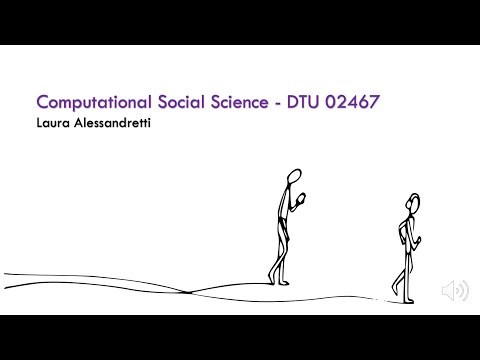

In [33]:
YouTubeVideo("UpwEsguMtY4",width=800, height=450)

> _Exercise 4: Authors overall activity_
> 1. Compute the total number of comments per author using the _comments dataset_. Then, make a histogram of the number of comments per author, using the function [``numpy.histogram``](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html), using logarithmic binning. Here are some important points on histograms (they should be already quite clear if you have watched the video above):
>     *  __Binning__: By default numpy makes 10 equally spaced bins, but you always have to customize the binning. The number and size of bins you choose for your histograms can completely change the visualization. If you use too few bins, the histogram doesn't portray well the data. If you have too many, you get a broken comb look. Unfortunately is no "best" number of bins, because different bin sizes can reveal different features of the data. Play a bit with the binning to find a suitable number of bins. Define a vector $\nu$ including the desired bins and then feed it as a parameter of numpy.histogram, by specifying _bins=\nu_ as an argument of the function. You always have at least two options:
>      * _Linear binning_: Use linear binning, when the data is not heavy tailed, by using ``np.linspace`` to define bins.
>      * _Logarithmic binning_: Use logarithmic binning, when the data is [heavy tailed](https://en.wikipedia.org/wiki/Fat-tailed_distribution), by using ``np.logspace`` to define your bins.
>     *  __Normalization__: To plot [probability densities](https://en.wikipedia.org/wiki/Probability_density_function), you can set the argument _density=True_ of the ``numpy.histogram`` function.
>
> 3. Compute the mean and the median value of the number of comments per author and plot them as vertical lines on top of your histogram. What do you observe? Which value do you think is more meaningful?

In [10]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def setup_mpl():
    #mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 200
    #mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

In [24]:
# First read reddit comments data
wsb_comments = pd.read_csv('data/week1/wallstreetbets_GME_comments.csv', parse_dates=['date'])

In [60]:
### Exercise 4: Authors overall activity

# Get number of comments per author
wsb_comments['comment_count'] = 1
author_comment_count = wsb_comments.groupby('author').agg({'comment_count':'sum'})

#comments_per_author = wsb_comments.groupby('author').size().values

### make a histogram of the number of comments per author, using the function numpy.histogram, using logarithmic binning.

# Get number of authors with x comments grouped
author_comment_count['freq'] = 1
comment_distribution = author_comment_count.groupby('comment_count').agg({'freq':'sum'})


Text(0, 0.5, 'Probability Density')

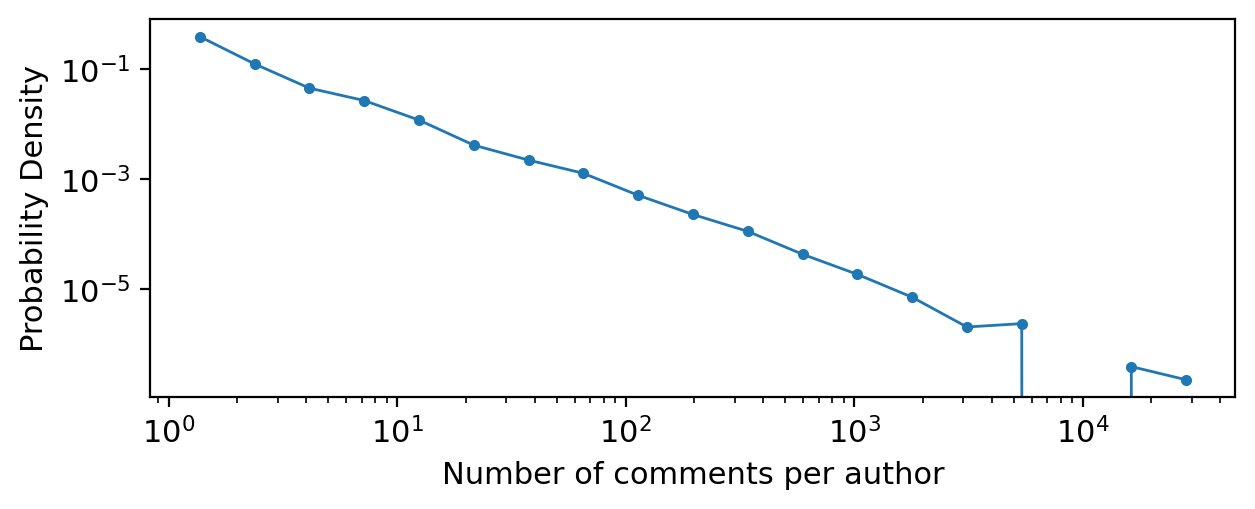

In [62]:
# Create histogram and plot

# Define bin count
bins = np.logspace(np.log10(1), np.log10(36000), 20)
#bins = np.linspace(1, 36000, 50)


# Compute histogram
hist, edges = np.histogram(comment_distribution.freq, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2.
width = bins[1] - bins[0]

xx, yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j>0])

fig, ax = plt.subplots()
#ax.bar(x, hist, width=width*0.9)
ax.plot(x, hist, marker='.')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Number of comments per author')
ax.set_ylabel('Probability Density')

In [ ]:
### Compute the mean and the median value of the number of comments per author and plot them as vertical lines on top of your histogram. What do you observe? Which value do you think is more meaningful?
print("Mean number of comments per author: {0}".format(author_comment_count['comment_count'].mean()))
print("Median number of comments per author: {0}".format(author_comment_count['comment_count'].median()))

> _Exercise 5: Authors lifespan_
>
> 1. For each author, find the time of publication of their first comment, _minTime_, and the time of publication of their last comment, _maxTime_, in [unix timestamp](https://www.unixtimestamp.com/). 
> 2. Compute the "lifespan" of authors as the difference between _maxTime_ and _minTime_. Note that timestamps are measured in seconds, but it is appropriate here to compute the lifespan in days. Make a histogram showing the distribution of lifespans, choosing appropriate binning. What do you observe?
> 3. Now, we will look at how many authors joined and abandoned the discussion on GME over time. First, use the numpy function [numpy.histogram2d](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html) to create a 2-dimensional histogram for the two variables _minTime_ and _maxTime_. A 2D histogram, is nothing but a histogram where bins have two dimensions, as we look simultaneously at two variables. You need to specify two arrays of bins, one for the values along the x-axis (_minTime_) and the other for the values along the y-axis (_maxTime_). Choose bins with length 1 week.
> 4. Now, use the matplotlib function [``plt.imshow``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to visualize the 2d histogram. You can follow [this example](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) on StackOverflow. To show dates instead of unix timestamps in the x and y axes, use [``mdates.date2num``](https://matplotlib.org/api/dates_api.html#matplotlib.dates.date2num). More details in this [StackOverflow example](https://stackoverflow.com/questions/23139595/dates-in-the-xaxis-for-a-matplotlib-plot-with-imshow), see accepted answer.
> 5. Make sure that the colormap allows to well interpret the data, by passing ``norm=mpl.colors.LogNorm()`` as an argument to imshow. This will ensure that your colormap is log-scaled. Then, add a [colorbar](https://matplotlib.org/3.1.0/gallery/color/colorbar_basics.html) on the side of the figure, with the appropriate [colorbar label](https://matplotlib.org/3.1.1/api/colorbar_api.html#matplotlib.colorbar.ColorbarBase.set_label).
> 6. As usual :) Look at the figure, and write down three key observations.


In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def setup_mpl():
    #mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 200
    #mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

In [2]:
# First read reddit comments data
wsb_comments = pd.read_csv('data/week1/wallstreetbets_GME_comments.csv', parse_dates=['date'])
print(wsb_comments)

                                                     body comment_id  \
0                                               [removed]    glszmz3   
1                                               [removed]    glo0vy9   
2                                              Still not?    glnys5s   
3                                               [removed]    glmchnq   
4                                               [removed]    glldyjd   
...                                                   ...        ...   
525035                                          😭😭😭 bruh.    fcp4s0n   
525036                     Go home, your parents miss you    fcp4j6m   
525037                       And is 7%+ out of the money.    fcp4chb   
525038  I thought YOLO was only done with options that...    fcp44yc   
525039                                                  👍    fcp3yk5   

       submission_id parent_id  score  created_utc       date         author  
0             l460tg   gknhjnp      1   1612313348 2021-

In [6]:


### 1. For each author, find the time of publication of their first comment, minTime, and the time of publication of their last comment, maxTime, in unix timestamp.
author_life = wsb_comments.groupby('author').agg('sum')
author_life['minTime'] = wsb_comments.groupby('author').agg({'created_utc':'min'})
author_life['maxTime'] = wsb_comments.groupby('author').agg({'created_utc':'max'})
print(author_life)

                    score  created_utc     minTime     maxTime    lifetime
author                                                                    
----The_Truth-----      3   4807822572  1602188181  1603376104   27.498218
----Zero----           46   8056376983  1611262117  1611327385    1.510833
---MrP---               7  11263208486  1609017376  1609096857    1.839838
---Tim---              13   9636631275  1590678467  1610402953  456.585324
--B_L_A_N_K--           1   1609524270  1609524270  1609524270    0.000000
...                   ...          ...         ...         ...         ...
zzzaacchh               9   3220434735  1609273859  1611160876   43.680949
zzzenDOTexe             1   1611972708  1611972708  1611972708    0.000000
zzzzazzzzzz             1   1611281917  1611281917  1611281917    0.000000
zzzzbear                2   1611248244  1611248244  1611248244    0.000000
zzzzzephyr            104  14501650086  1611246750  1611359700    2.614583

[75366 rows x 5 columns]

Text(0, 0.5, 'Probability Density')

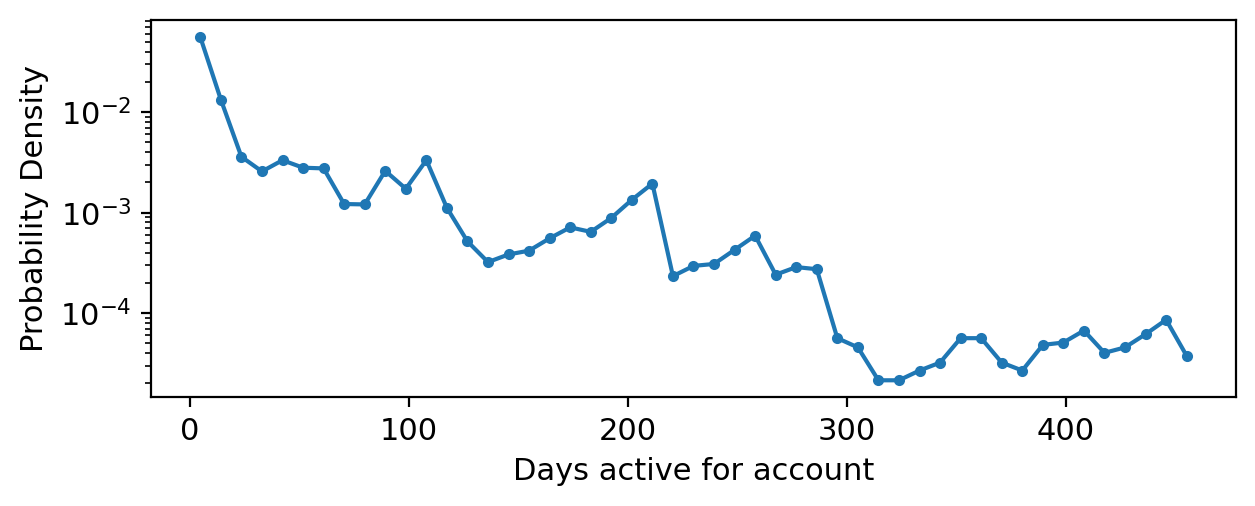

In [22]:
### 2. Compute the "lifespan" of authors as the difference between maxTime and minTime. Note that timestamps are measured in seconds, but it is appropriate here to compute the lifespan in days. Make a histogram showing the distribution of lifespans, choosing appropriate binning. What do you observe?
author_life['lifetime'] = (author_life.maxTime - author_life.minTime) / (60*60*12)
#print(author_life)


# Create histogram and plot

# Define bin count
#bins = np.logspace(np.log10(1), np.log10(36000), 20)
bins = np.linspace(0, 460, 50)

# Compute histogram
nonzero_authorlife = [i for i in author_life.lifetime if i > 0]
#print(nonzero_authorlife)
hist, edges = np.histogram(nonzero_authorlife, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2.
width = bins[1] - bins[0]

# Removing possible empty bins
#xx, yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j>0])

fig, ax = plt.subplots()
#ax.bar(x, hist, width=width*0.9)
ax.plot(x, hist, marker='.')
#ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Days active for account')
ax.set_ylabel('Probability Density')

In [ ]:
### 3. Now, we will look at how many authors joined and abandoned the discussion on GME over time. First, use the numpy function numpy.histogram2d to create a 2-dimensional histogram for the two variables minTime and maxTime. A 2D histogram, is nothing but a histogram where bins have two dimensions, as we look simultaneously at two variables. You need to specify two arrays of bins, one for the values along the x-axis (minTime) and the other for the values along the y-axis (maxTime). Choose bins with length 1 week.




### 4. Now, use the matplotlib function plt.imshow to visualize the 2d histogram. You can follow this example on StackOverflow. To show dates instead of unix timestamps in the x and y axes, use mdates.date2num. More details in this StackOverflow example, see accepted answer.



### 5. Make sure that the colormap allows to well interpret the data, by passing norm=mpl.colors.LogNorm() as an argument to imshow. This will ensure that your colormap is log-scaled. Then, add a colorbar on the side of the figure, with the appropriate colorbar label.



### 6. As usual :) Look at the figure, and write down three key observations.

